In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./input/playground-series-s3e1/train.csv')
test = pd.read_csv('./input/playground-series-s3e1/test.csv')
submission = pd.read_csv('./input/playground-series-s3e1/sample_submission.csv')
train.shape, test.shape, submission.shape

((37137, 10), (24759, 9), (24759, 2))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24759 entries, 0 to 24758
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24759 non-null  int64  
 1   MedInc      24759 non-null  float64
 2   HouseAge    24759 non-null  float64
 3   AveRooms    24759 non-null  float64
 4   AveBedrms   24759 non-null  float64
 5   Population  24759 non-null  float64
 6   AveOccup    24759 non-null  float64
 7   Latitude    24759 non-null  float64
 8   Longitude   24759 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.7 MB


In [5]:
train.head(3)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576


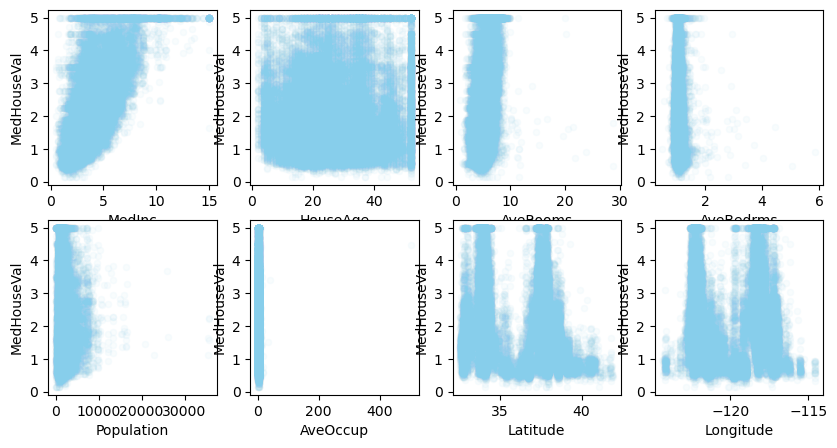

In [6]:
cols = list(train.columns)
fig, ax = plt.subplots(2,4, figsize=(10,5))
ax = ax.flatten()
for i, col in enumerate(cols[1:-1]):
    train.plot(kind='scatter', x=col, y='MedHouseVal', ax=ax[i], 
               alpha=0.05, color='skyblue')
plt.show()

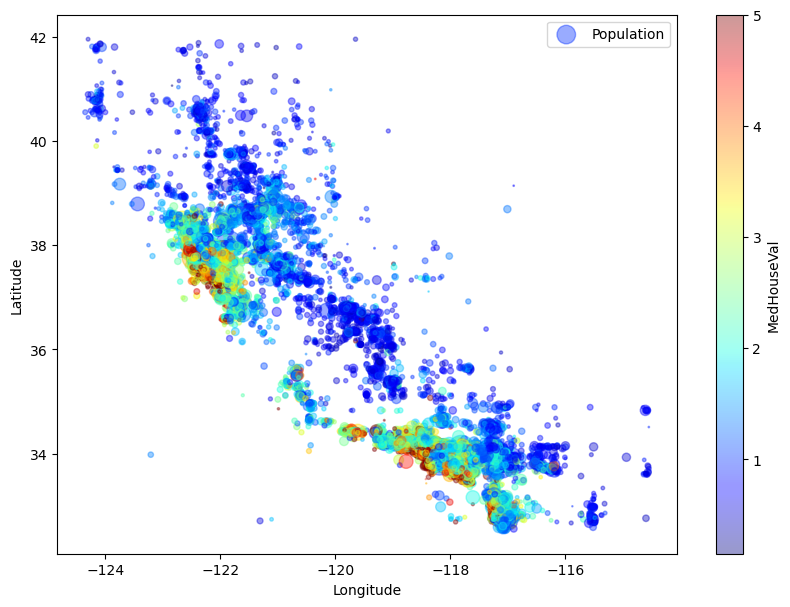

In [7]:
train.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4,
          s=train['Population']/100, label='Population', figsize=(10,7),
          c='MedHouseVal', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [8]:
train.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


MedHouseVal    1.000000
MedInc         0.701925
AveRooms       0.366727
medinc/p       0.112488
HouseAge       0.103210
Population    -0.038479
AveOccup      -0.048475
Longitude     -0.056742
AveBedrms     -0.067487
Latitude      -0.116499
br/r          -0.286120
Name: MedHouseVal, dtype: float64


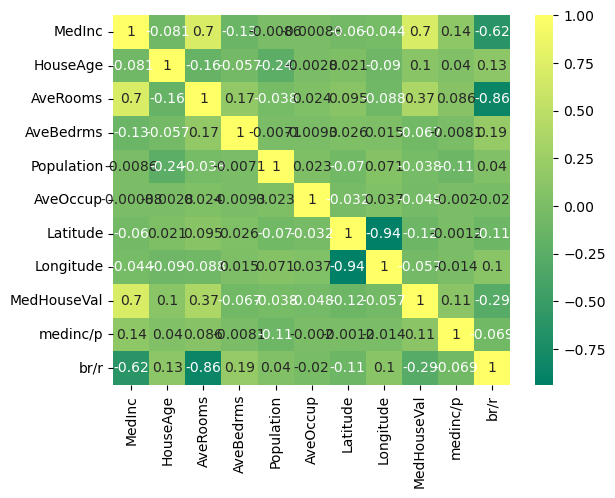

In [9]:
train_check = train.iloc[:,1:].copy()
train_check['medinc/p'] = train_check['MedInc']/train_check['Population']
train_check['br/r'] = train_check['AveBedrms']/train_check['AveRooms']
corr_matrix = train_check.corr()
print(corr_matrix['MedHouseVal'].sort_values(ascending=False))
sns.heatmap(corr_matrix, cmap='summer', cbar=True, annot=True)
plt.show()

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
col_li = ['MedInc', 'Population', 'AveBedrms', 'AveRooms']
medinc_ix, pop_ix, brms_ix, rms_ix = [train.iloc[:,1:-1].columns.get_loc(c) 
                                      for c in col_li]

class myFitTrans(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        medinc_per_population = X.iloc[:,medinc_ix] / X.iloc[:,pop_ix]
        bedrms_per_rms = X.iloc[:,brms_ix] / X.iloc[:,rms_ix]
        return np.c_[X, medinc_per_population, bedrms_per_rms]

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
pipeline = Pipeline([
        ('adder', myFitTrans()),
        ('std_scaler', StandardScaler())])
poly_pipeline = Pipeline([
        ('adder', myFitTrans()),
        ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('std_scaler', StandardScaler())])
train_pre = pipeline.fit_transform(train.iloc[:,1:-1])
train_pre_poly = poly_pipeline.fit_transform(train.iloc[:,1:-1])

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
scores = {}
scoring = 'neg_mean_squared_error'
cv = 3

In [26]:
# LinearRegression
lin_reg = LinearRegression()
scores['lin_reg'] = cross_validate(lin_reg, train_pre, train['MedHouseVal'],
                         scoring=scoring, cv=cv)
# SGDRegressor
sgd_reg = SGDRegressor(eta0=0.0001, random_state=42)
scores['sgd_reg'] = cross_validate(sgd_reg, train_pre_poly, train['MedHouseVal'],
                         scoring=scoring, cv=cv)
# Poly_LinearRegression
p_lin_reg = LinearRegression()
scores['p_lin_reg'] = cross_validate(p_lin_reg, train_pre_poly, train['MedHouseVal'],
                         scoring=scoring, cv=cv)
# Poly_SGDRegressor
p_sgd_reg = SGDRegressor(eta0=0.0001, random_state=42)
scores['p_sgd_reg'] = cross_validate(p_sgd_reg, train_pre_poly, train['MedHouseVal'],
                         scoring=scoring, cv=cv)
# Ridge(use saga == SGD)
ridge_reg = Ridge(alpha=1, solver="saga", random_state=42, max_iter=1000)
scores['ridge_reg'] = cross_validate(ridge_reg, train_pre, train['MedHouseVal'],
                         scoring=scoring, cv=cv)
# Lasso
lasso_reg = Lasso(alpha=0.1)
scores['lasso_reg'] = cross_validate(lasso_reg, train_pre, train['MedHouseVal'],
                         scoring=scoring, cv=cv)
# ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
scores['elastic_reg'] = cross_validate(elastic_reg, train_pre, train['MedHouseVal'],
                         scoring=scoring, cv=cv)

In [15]:
# find best parameters for RandomForest
from sklearn.model_selection import GridSearchCV
# param_grid = [{'n_estimators': [10, 30, 50], 
#                'max_features': [2, 4, 6, 8]}]
# forest_reg = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(forest_reg, param_grid, cv=cv,
#                            scoring=scoring, return_train_score=True)
# grid_search.fit(train_pre, train['MedHouseVal'])
# rf_mxf = grid_search.best_params_['max_features']
# rf_n = grid_search.best_params_['n_estimators']
# print(rf_mxf, rf_n) # 8 50

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# param_distribs = {'n_estimators': randint(low=5, high=100),
#                  'max_features': randint(low=2, high=20)}
# rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
#                                 n_iter=10, cv=cv, scoring=scoring, random_state=42)
# rnd_search.fit(train_pre, train['MedHouseVal'])
# rd_rf_mxf = rnd_search.best_params_['max_features']
# rd_rf_n = rnd_search.best_params_['n_estimators']
# print(rd_rf_mxf, rd_rf_n) # 8 87 / 8 56

8 50


In [15]:
# # find best parameters for SVM
# param_grid = [{'epsilon': [0.05, 0.1, 0.5, 1.0]}]
# svm_reg = LinearSVR(random_state=42)
# grid_search = GridSearchCV(svm_reg, param_grid, cv=cv,
#                            scoring=scoring, return_train_score=True)
# grid_search.fit(train_pre, train['MedHouseVal'])
# svm_eps = grid_search.best_params_['epsilon']
# print(svm_eps) # 0.05

# param_grid = [{'C': [0.1, 1, 50, 100], 
#                'epsilon': [0.05, 0.1, 0.5, 1.0]}]
# p_svm_reg = SVR(kernel='poly', degree=2)
# grid_search = GridSearchCV(p_svm_reg, param_grid, cv=cv,
#                            scoring=scoring, return_train_score=True)
# grid_search.fit(train_pre, train['MedHouseVal'])
# p_svm_eps = grid_search.best_params_['epsilon']
# p_svm_c = grid_search.best_params_['C']
# print(p_svm_eps, p_svm_c)

In [20]:
# DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
scores['tree_reg'] = cross_validate(tree_reg, train_pre, train['MedHouseVal'],
                         scoring=scoring, cv=cv)

# RandomForestRegressor
rf_mxf, rf_n = 8, 50
forest_reg = RandomForestRegressor(max_features=rf_mxf, n_estimators=rf_n, random_state=42)
scores['forest_reg'] = cross_validate(forest_reg, train_pre, train['MedHouseVal'],
                         scoring=scoring, cv=cv)

# RandomForestRegressor_rand
rd_rf_mxf, rd_rf_n = 8, 87
forest_reg_rd = RandomForestRegressor(max_features=rd_rf_mxf, n_estimators=rd_rf_n, random_state=42)
scores['forest_reg_rd'] = cross_validate(forest_reg, train_pre, train['MedHouseVal'],
                         scoring=scoring, cv=cv)

# SVM_LinearSVR
svm_eps = 0.05
svm_reg = LinearSVR(epsilon=svm_eps)
scores['svm_reg'] = cross_validate(svm_reg, train_pre, train['MedHouseVal'],
                         scoring=scoring, cv=cv)

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
# # SVM_SVR
# p_svm_c = 100; p_svm_eps = 0.1
# p_svm_reg = SVR(kernel='poly', degree=2, C=p_svm_c, epsilon=p_svm_eps)
# scores['p_svm_reg'] = cross_validate(p_svm_reg, train_pre, train['MedHouseVal'],
#                          scoring=scoring, cv=cv)

In [27]:
min_score = 1; best_model = 'best_model'
for k,v in scores.items():
    print('- {0:<14}/'.format(k), 
          'time:',round(sum(v['fit_time'])+sum(v['score_time']),3), end=' ')
    score = np.sqrt(-v['test_score'])
    print('/ 평균:', round(score.mean(),3), '/ 표준편차:', round(score.std(),3))
    if min_score>=score.mean():
        min_score = score.mean(); best_model = k
print('-'*30,'\nbest_model:', best_model)

- lin_reg       / time: 0.07 / 평균: 0.913 / 표준편차: 0.263
- sgd_reg       / time: 2.327 / 평균: 0.862 / 표준편차: 0.187
- p_lin_reg     / time: 0.57 / 평균: 10.546 / 표준편차: 13.948
- p_sgd_reg     / time: 2.22 / 평균: 0.862 / 표준편차: 0.187
- ridge_reg     / time: 4.982 / 평균: 0.913 / 표준편차: 0.262
- lasso_reg     / time: 0.142 / 평균: 0.815 / 표준편차: 0.003
- elastic_reg   / time: 0.292 / 평균: 0.794 / 표준편차: 0.005
- tree_reg      / time: 3.015 / 평균: 0.841 / 표준편차: 0.009
- forest_reg    / time: 74.507 / 평균: 0.603 / 표준편차: 0.002
- forest_reg_rd / time: 74.416 / 평균: 0.603 / 표준편차: 0.002
- svm_reg       / time: 12.847 / 평균: 0.893 / 표준편차: 0.243
------------------------------ 
best_model: forest_reg_rd


In [25]:
# eval(best_model).fit(train_pre, train['MedHouseVal'])
# test_pre = pipeline.transform(test.iloc[:,1:])
# pred = eval(best_model).predict(test_pre)
# submission['MedHouseVal'] = pred
# ver = '3'
# submission.to_csv('./output/submission_PGs3e1_{}.csv'.format(ver), index=False)

- ver 1. RandomForestRegressor(max_features=8, n_estimators=56, random_state=42) -> 0.59469
- ver 2. RandomForestRegressor(max_features=8, n_estimators=87, random_state=42) -> 0.59353
